1. Presentation visualizations
2. Additional model testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

import pickle

In [70]:
def mape(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Absolute Percentage Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
#     difference = abs((observations - estimates)/observations)
#     mape = (sum(difference)/len(observations))*100
    mape = np.mean(np.abs((observations - estimates) / observations)) * 100
    return mape

In [71]:
def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

In [72]:
dataset = 'PGE-CSI-00114'

with open('pickles/data_'+dataset+'_train0.pickle', 'rb') as to_read:
    data_train = pickle.load(to_read)
with open('pickles/data_'+dataset+'_test0.pickle', 'rb') as to_read:
    data_test = pickle.load(to_read)

In [73]:
with open('pickles/weather_fresno.pickle', 'rb') as to_read:
    weather = pickle.load(to_read)
    
with open('pickles/solar_fresno.pickle', 'rb') as to_read:
    solar = pickle.load(to_read)

In [74]:
print(data_train.shape)
print(data_test.shape)

(43824,)
(8784,)


In [75]:
# combine data train and test
data_train = data_train.append(data_test)
data_train.shape

(52608,)

### Annual visualization

In [76]:
data_daily = data_train.resample('D').sum()
# data_monthly = data_train.resample('W').mean()
data_monthly = data_daily.resample('M').mean()

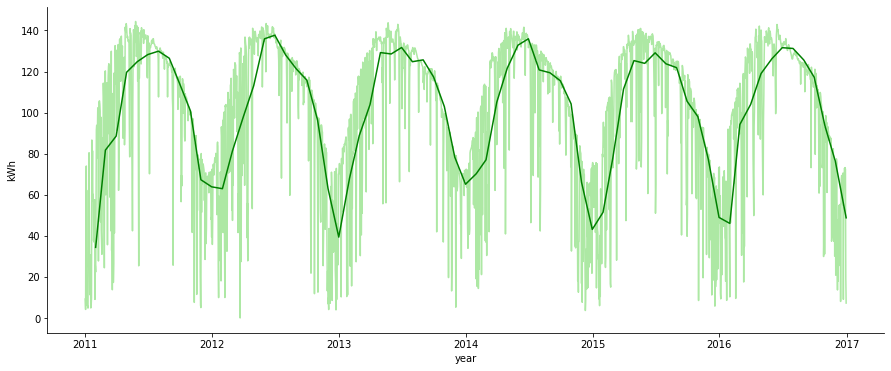

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,6))

ax.plot(data_daily,alpha=0.65,label='daily mean',c='#81dd73')
ax.plot(data_monthly,label='monthly resampled mean',c='#008000')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.set_xlabel('year')
ax.set_ylabel('kWh')

fig.savefig("figures/mean_kWh_2011-16.png", bbox_inches = 'tight',transparent=True);

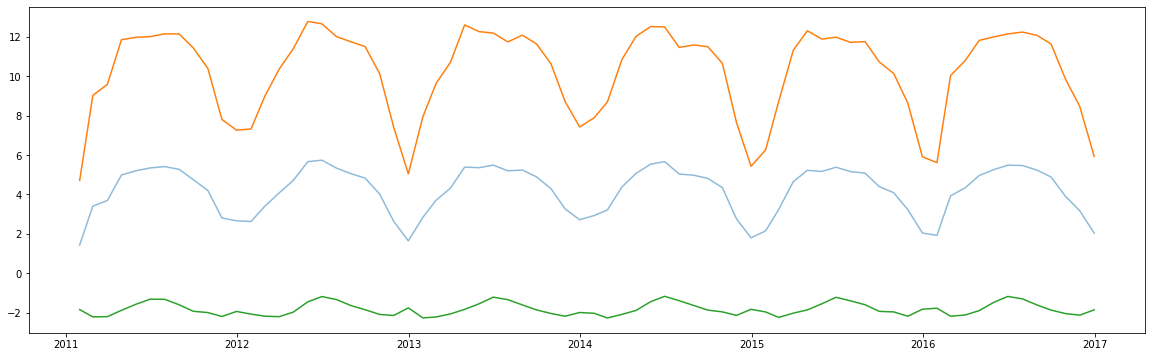

In [165]:
data_daily = data_train.resample('M').mean()
data_daily_std1 = data_train.resample('M').mean()+data_train.resample('M').std()
data_daily_std2 = data_train.resample('M').mean()-data_train.resample('M').std()

plt.figure(figsize=(20,6))
plt.plot(data_daily,alpha=0.5)
plt.plot(data_daily_std1)
plt.plot(data_daily_std2);

### Visualize summer/winter

In [204]:
# SUMMER EXAMPLE
start = dt.datetime(2016,7,1,0,0)
end = start+dt.timedelta(hours=24*14-1)

data_hourly = data_train[start:end]
data_daily = data_train[start:end].resample('D').mean()
# data_monthly = data_train.resample('W').mean()
data_monthly = data_daily[start:end].resample('M').mean()

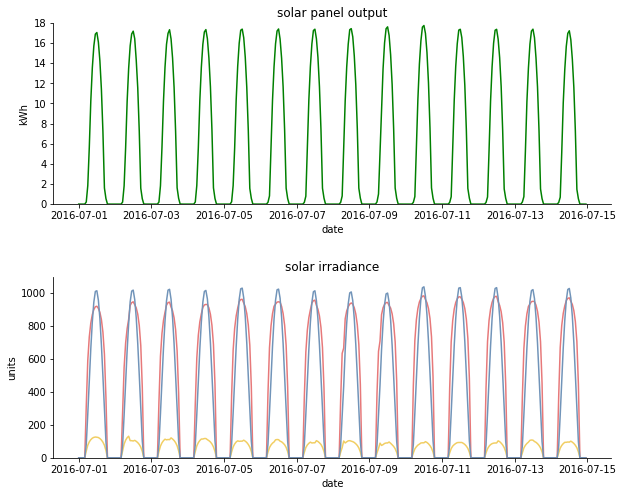

In [207]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1,figsize=(10,8))
fig.subplots_adjust(hspace=.4)

ax1.plot(data_hourly,label='kWh',c='#008000')
# ax.plot(data_daily,label='monthly resampled mean',c='#008000')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax1.set_ylim(0,18)
ax1.set_xlabel('date')
ax1.set_ylabel('kWh')
ax1.set_title('solar panel output')

ax2.plot(solar['DHI'][start:end],label='DHI',c='#f1ce63')
ax2.plot(solar['DNI'][start:end],label='DNI',c='#e7797a')
ax2.plot(solar['GHI'][start:end],label='GHI',c='#7194b9')
# ax.plot(data_daily,label='monthly resampled mean',c='#008000')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax2.set_ylim(0,1100)
ax2.set_xlabel('date')
ax2.set_ylabel('units')
ax2.set_title('solar irradiance')


fig.savefig("figures/mean_kWh_summer_16.png", bbox_inches = 'tight',transparent=True);

In [208]:
# WINTER EXAMPLE
start = dt.datetime(2016,12,1,0,0)
end = start+dt.timedelta(hours=24*14-1)

data_hourly = data_train[start:end]
data_daily = data_train[start:end].resample('D').mean()
# data_monthly = data_train.resample('W').mean()
data_monthly = data_daily[start:end].resample('M').mean()

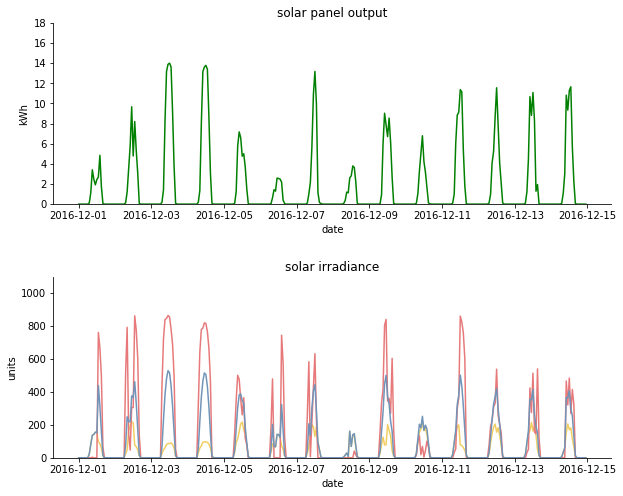

In [209]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1,figsize=(10,8))
fig.subplots_adjust(hspace=.4)

ax1.plot(data_hourly,label='kWh',c='#008000')
# ax.plot(data_daily,label='monthly resampled mean',c='#008000')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax1.set_ylim(0,18)
ax1.set_xlabel('date')
ax1.set_ylabel('kWh')
ax1.set_title('solar panel output')

ax2.plot(solar['DHI'][start:end],label='DHI',c='#f1ce63')
ax2.plot(solar['DNI'][start:end],label='DNI',c='#e7797a')
ax2.plot(solar['GHI'][start:end],label='GHI',c='#7194b9')
# ax.plot(data_daily,label='monthly resampled mean',c='#008000')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax2.set_ylim(0,1100)
ax2.set_xlabel('date')
ax2.set_ylabel('units')
ax2.set_title('solar irradiance')


fig.savefig("figures/mean_kWh_winter_16.png", bbox_inches = 'tight',transparent=True);

### Daily forecasting for a time period (ndays), using the past x days

In [37]:
import statsmodels.api as sm

In [240]:
def forecast(startdate,x=7,ndays=30):
    train_mse = []
    test_mse = []
    train_rmse = []
    test_rmse = []
    train_mape = []
    test_mape = []
    data_for_all = []
    data_test1_all = []

    for i in range(0,ndays):
        # generate range
        train_start = startdate+dt.timedelta(hours=24*i)
        train_end = train_start+dt.timedelta(hours=(24*x-1))
        test_start = train_end+dt.timedelta(hours=1)
        test_end = test_start+dt.timedelta(hours=23)

        #subset data
        data_train1 = data_train[train_start:train_end]
        data_test1 = data_train[test_start:test_end]

        weather_train1 = weather[['sunlight']][train_start:train_end]
        weather_test1 = weather[['sunlight']][test_start:test_end]

        solar_train1 = solar[train_start:train_end]
        solar_test1 = solar[test_start:test_end]

    #     print(data_train1.shape)
    #     print(data_test1.shape)
    #     print(weather_train1.values.shape)
    #     print(weather_test1.values.shape)
    #     print(solar_train1.values.shape)
    #     print(solar_test1.values.shape)

        # model, predict, forecast
        sar = sm.tsa.statespace.SARIMAX(data_train1,
                                    exog=solar_train1.values,
                                    order=(1,1,1), 
                                    seasonal_order=(0,1,1,24), 
                                    trend='c').fit(maxiter=250)

        y_pred = sar.predict(start=0,end=len(data_train1)-1,dynamic=False)

        a = data_test1.shape[0]
        data_for = sar.forecast(steps=a,exog=solar_test1.values)

#         print(sar.mle_retvals)

        #remove non-0 data during night hours (can't have negative values, which appear to be momentum)
        for i,val in y_pred.iteritems():
            if weather_train1['sunlight'][i] == 0 :
                y_pred[i]=0
            if val < 0 :
                y_pred[i]=0
        for i,val in data_for.iteritems():
            if weather_test1['sunlight'][i] == 0 :
                data_for[i]=0
            if val < 0 :
                data_for[i]=0

        for j in data_for.values:
            data_for_all.append(j)
        for k in data_test1.values:
            data_test1_all.append(k)
        
        train_mse.append(mse(data_train1.values,y_pred.values))
        test_mse.append(mse(data_test1.values,data_for.values))
        train_rmse.append(np.sqrt(mse(data_train1.values,y_pred.values)))
        test_rmse.append(np.sqrt(mse(data_test1.values,data_for.values)))

        #calculate MAPE for non-zero values
        for j,v in data_train1.iteritems():
            if data_train1[j]==0:
                data_train1.pop(j)
                y_pred.pop(j)
        for k,a in data_test1.iteritems():
            if data_test1[k]==0:
                data_test1.pop(k)
                data_for.pop(k)

        train_mape.append(mape(data_train1.values,y_pred.values))
        test_mape.append(mape(data_test1.values,data_for.values))


    #MAPE for test data
    plt.figure(figsize=(20,6))
    plt.plot(train_mape,alpha=0.5,label='train')
    plt.plot(test_mape,alpha=0.5,label='test')
    plt.title('MAPE')
    plt.xlabel('days')
    plt.legend()
    plt.show();

    #RMSE for test data
    plt.figure(figsize=(20,6))
    plt.plot(train_rmse,alpha=0.5,label='train')
    plt.plot(test_rmse,alpha=0.5,label='test')
    plt.title('RSME')
    plt.xlabel('days')
    plt.legend()
    plt.show();
    
    #test data
    graph_index_a = pd.date_range(startdate,startdate+dt.timedelta(days=ndays+x),freq='H')[:-1]
    graph_index_f = pd.date_range(startdate+dt.timedelta(days=x),startdate+dt.timedelta(days=ndays+x),freq='H')[:-1]
    hist_data = data_train[startdate:startdate+dt.timedelta(days=ndays+x)][:-1]
    solar_data = solar[startdate:startdate+dt.timedelta(days=ndays+x)][:-1]
    weather_data = weather['sunlight'][startdate:startdate+dt.timedelta(days=ndays+x)][:-1]
    
    plt.figure(figsize=(20,6))
#     plt.plot(graph_index,data_test1_all,alpha=0.5,label='actual')
    plt.plot(graph_index_a,hist_data,alpha=0.5,label='actual')
    plt.plot(graph_index_f,data_for_all,alpha=0.5,label='forecasted')
    plt.title('forecasted vs. actual')
    plt.xlabel('days')
    plt.legend()
    plt.show();
    
    plt.figure(figsize=(20,6))
    plt.plot(graph_index_a,solar_data['DHI'],alpha=0.5,label='DHI')
    plt.plot(graph_index_a,solar_data['DNI'],alpha=0.5,label='DNI')
    plt.plot(graph_index_a,solar_data['GHI'],alpha=0.5,label='GHI')
    plt.title('solar irradiance')
    plt.xlabel('days')
    plt.legend()
    plt.show();
    
    return data_test1_all, data_for_all, solar_data, hist_data, weather_data, train_mape, test_mape, graph_index_a, graph_index_f

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conv

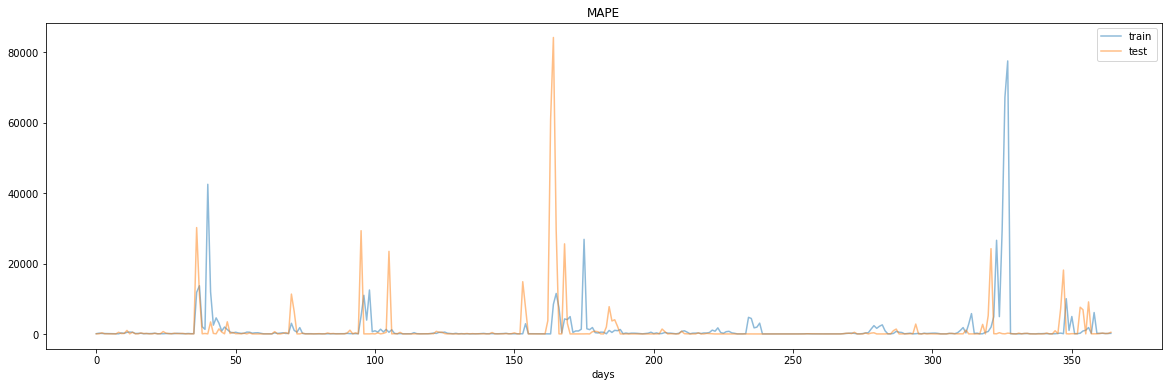

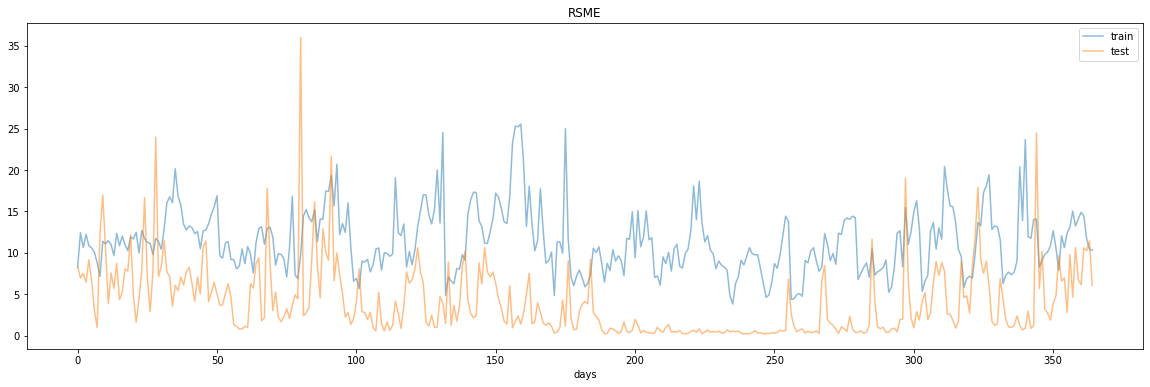

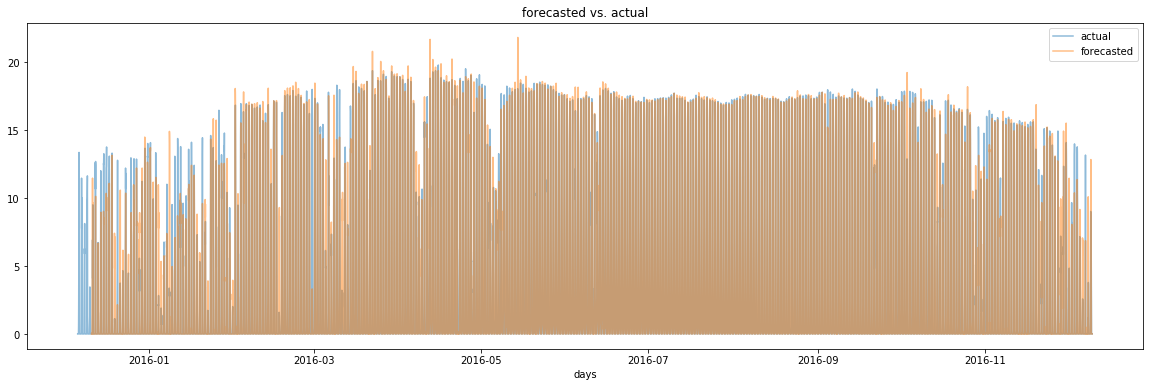

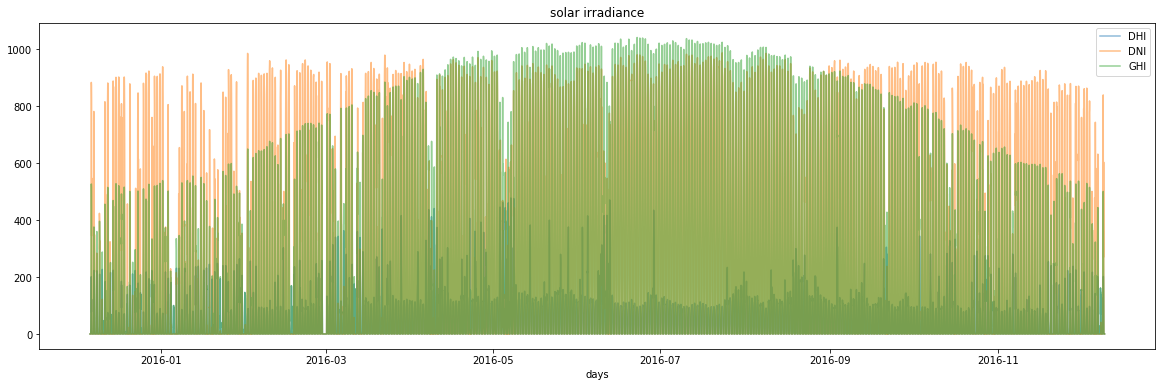

In [39]:
data_test1_all2, data_for_all2, solar_data2, hist_data2, weather_data2, train_mape2, test_mape2, graph_index_a2, graph_index_f2 = forecast(dt.datetime(2015,12,6,0,0),x=5,ndays=365)

In [40]:
#save out data
historical = hist_data2.to_frame()
forecast = pd.DataFrame(data_for_all2, index=graph_index_f2, columns=['forecast'])
solar_i = pd.DataFrame(solar_data2, index=graph_index_a2)
sunlight = weather_data2.to_frame()

all_data = pd.merge(historical,forecast,left_index=True,right_index=True,how='left')
all_data = pd.merge(all_data,solar_i,left_index=True,right_index=True)
all_data = pd.merge(all_data,sunlight,left_index=True,right_index=True)

In [41]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8880 entries, 2015-12-06 00:00:00 to 2016-12-09 23:00:00
Freq: H
Data columns (total 6 columns):
kWh         8880 non-null float64
forecast    8760 non-null float64
DHI         8880 non-null int64
DNI         8880 non-null int64
GHI         8880 non-null int64
sunlight    8880 non-null int64
dtypes: float64(2), int64(4)
memory usage: 805.6 KB


In [54]:
#drop actual values for the latest date
latest = max(all_data.index.date)
all_data['kWh'][all_data.index.date == latest] = np.nan
all_data['kWh'][all_data.index.date == latest]

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


date_time
2016-12-09 00:00:00   NaN
2016-12-09 01:00:00   NaN
2016-12-09 02:00:00   NaN
2016-12-09 03:00:00   NaN
2016-12-09 04:00:00   NaN
2016-12-09 05:00:00   NaN
2016-12-09 06:00:00   NaN
2016-12-09 07:00:00   NaN
2016-12-09 08:00:00   NaN
2016-12-09 09:00:00   NaN
2016-12-09 10:00:00   NaN
2016-12-09 11:00:00   NaN
2016-12-09 12:00:00   NaN
2016-12-09 13:00:00   NaN
2016-12-09 14:00:00   NaN
2016-12-09 15:00:00   NaN
2016-12-09 16:00:00   NaN
2016-12-09 17:00:00   NaN
2016-12-09 18:00:00   NaN
2016-12-09 19:00:00   NaN
2016-12-09 20:00:00   NaN
2016-12-09 21:00:00   NaN
2016-12-09 22:00:00   NaN
2016-12-09 23:00:00   NaN
Freq: H, Name: kWh, dtype: float64

In [55]:
#mape
forecast_mape = pd.DataFrame(test_mape2, index= sorted(list(set(graph_index_f2.date))), columns=['MAPE'])

In [72]:
# log MAPE and rolling average
forecast_mape['MAPE2'] = np.log(forecast_mape['MAPE'])
forecast_mape['MAPE2_30d'] = forecast_mape['MAPE2'].rolling(30,center=True).mean()

In [73]:
all_data.to_csv('output/all_data.csv')
forecast_mape.to_csv('output/forecast_mape.csv')

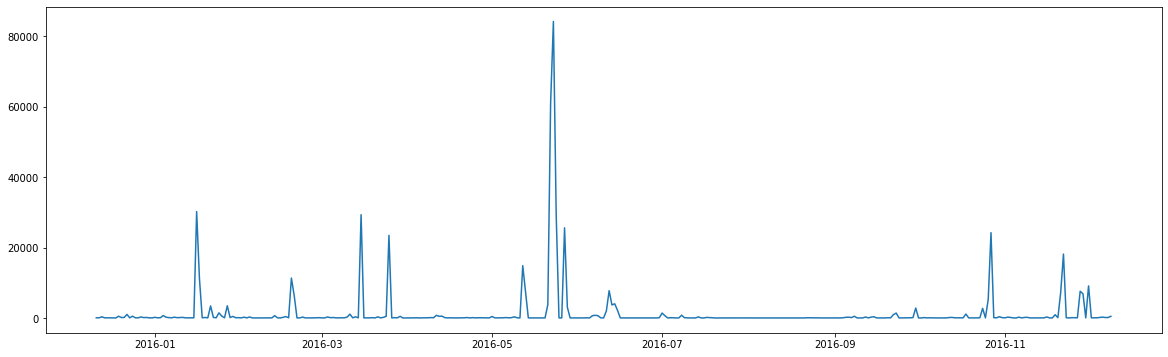

In [61]:
plt.figure(figsize=(20,6))
plt.plot(forecast_mape2['MAPE']);

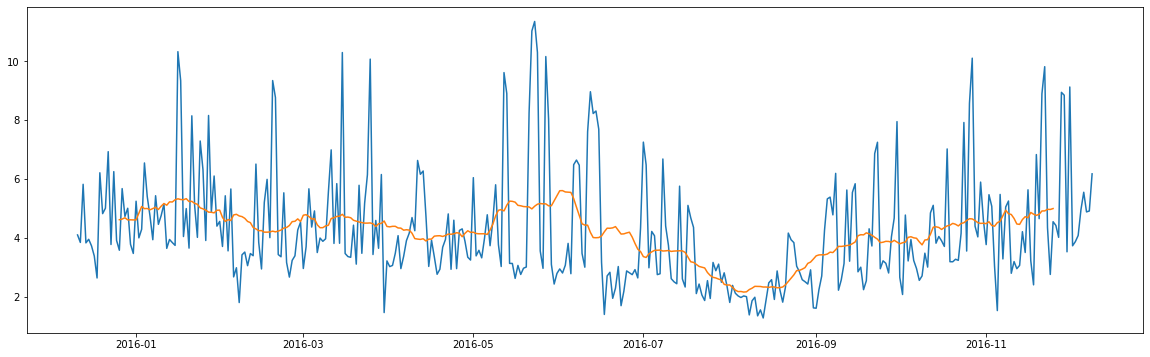

In [65]:
plt.figure(figsize=(20,6))
plt.plot(forecast_mape2['MAPE2'])
plt.plot(forecast_mape2['MAPE2'].rolling(30,center=True).mean());

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2015-12-11 to 2016-12-09
Data columns (total 3 columns):
MAPE         365 non-null float64
MAPE2        365 non-null float64
MAPE2_30d    336 non-null float64
dtypes: float64(3)
memory usage: 11.4+ KB


### Weekly forecasting using the past 3 weeks

In [137]:
def forecast_week(startdate,x=21,nweeks=1):
    train_mse = []
    test_mse = []
    train_rmse = []
    test_rmse = []
    train_mape = []
    test_mape = []
    data_for_all = []
    data_test1_all = []

    for i in range(0,nweeks):
        # generate range
        train_start = startdate+dt.timedelta(hours=24*i)
        train_end = train_start+dt.timedelta(hours=(24*x-1))
        test_start = train_end+dt.timedelta(hours=1)
        test_end = test_start+dt.timedelta(hours=24*7-1)

        #subset data
        data_train1 = data_train[train_start:train_end]
        data_test1 = data_train[test_start:test_end]

        weather_train1 = weather[['sunlight']][train_start:train_end]
        weather_test1 = weather[['sunlight']][test_start:test_end]

        solar_train1 = solar[train_start:train_end]
        solar_test1 = solar[test_start:test_end]

        print(data_train1.shape)
        print(data_test1.shape)
        print(weather_train1.values.shape)
        print(weather_test1.values.shape)
        print(solar_train1.values.shape)
        print(solar_test1.values.shape)

        # model, predict, forecast
        sar = sm.tsa.statespace.SARIMAX(data_train1,
                                    exog=solar_train1.values,
                                    order=(1,1,1), 
                                    seasonal_order=(0,1,1,24), 
                                    trend='c').fit(maxiter=250)

        y_pred = sar.predict(start=0,end=len(data_train1)-1,dynamic=False)

        a = data_test1.shape[0]
        data_for = sar.forecast(steps=a,exog=solar_test1.values)

#         print(sar.mle_retvals)

        #remove non-0 data during night hours (can't have negative values, which appear to be momentum)
        for i,val in y_pred.iteritems():
            if weather_train1['sunlight'][i] == 0 :
                y_pred[i]=0
            if val < 0 :
                y_pred[i]=0
        for i,val in data_for.iteritems():
            if weather_test1['sunlight'][i] == 0 :
                data_for[i]=0
            if val < 0 :
                data_for[i]=0

        for j in data_for.values:
            data_for_all.append(j)
        for k in data_test1.values:
            data_test1_all.append(k)
        
        train_mse.append(mse(data_train1.values,y_pred.values))
        test_mse.append(mse(data_test1.values,data_for.values))
        train_rmse.append(np.sqrt(mse(data_train1.values,y_pred.values)))
        test_rmse.append(np.sqrt(mse(data_test1.values,data_for.values)))

        #calculate MAPE for non-zero values
        for j,v in data_train1.iteritems():
            if data_train1[j]==0:
                data_train1.pop(j)
                y_pred.pop(j)
        for k,a in data_test1.iteritems():
            if data_test1[k]==0:
                data_test1.pop(k)
                data_for.pop(k)

        train_mape.append(mape(data_train1.values,y_pred.values))
        test_mape.append(mape(data_test1.values,data_for.values))


    #MAPE for test data
    plt.figure(figsize=(20,6))
    plt.plot(train_mape,alpha=0.5,label='train')
    plt.plot(test_mape,alpha=0.5,label='test')
    plt.title('MAPE')
    plt.xlabel('days')
    plt.legend()
    plt.show();

    #RMSE for test data
    plt.figure(figsize=(20,6))
    plt.plot(train_rmse,alpha=0.5,label='train')
    plt.plot(test_rmse,alpha=0.5,label='test')
    plt.title('RSME')
    plt.xlabel('days')
    plt.legend()
    plt.show();
    
    #test data
    graph_index_a = pd.date_range(startdate,startdate+dt.timedelta(days=nweeks*7+x),freq='H')[:-1]
    graph_index_f = pd.date_range(startdate+dt.timedelta(days=x),startdate+dt.timedelta(days=nweeks*7+x),freq='H')[:-1]
    hist_data = data_train[startdate:startdate+dt.timedelta(days=nweeks*7+x)][:-1]
    solar_data = solar[startdate:startdate+dt.timedelta(days=nweeks*7+x)][:-1]
    weather_data = weather['sunlight'][startdate:startdate+dt.timedelta(days=nweeks*7+x)][:-1]
    
    plt.figure(figsize=(20,6))
    plt.plot(graph_index_a,hist_data,alpha=0.5,label='actual')
    plt.plot(graph_index_f,data_for_all,alpha=0.5,label='forecasted')
    plt.title('forecasted vs. actual')
    plt.xlabel('days')
    plt.legend()
    plt.show();
    
    plt.figure(figsize=(20,6))
    plt.plot(graph_index_a,solar_data['DHI'],alpha=0.5,label='DHI')
    plt.plot(graph_index_a,solar_data['DNI'],alpha=0.5,label='DNI')
    plt.plot(graph_index_a,solar_data['GHI'],alpha=0.5,label='GHI')
    plt.title('solar irradiance')
    plt.xlabel('days')
    plt.legend()
    plt.show();
    
    return data_test1_all, data_for_all, solar_data, hist_data, weather_data, train_mape, test_mape, graph_index_a, graph_index_f

(504,)
(168,)
(504, 1)
(168, 1)
(504, 3)
(168, 3)


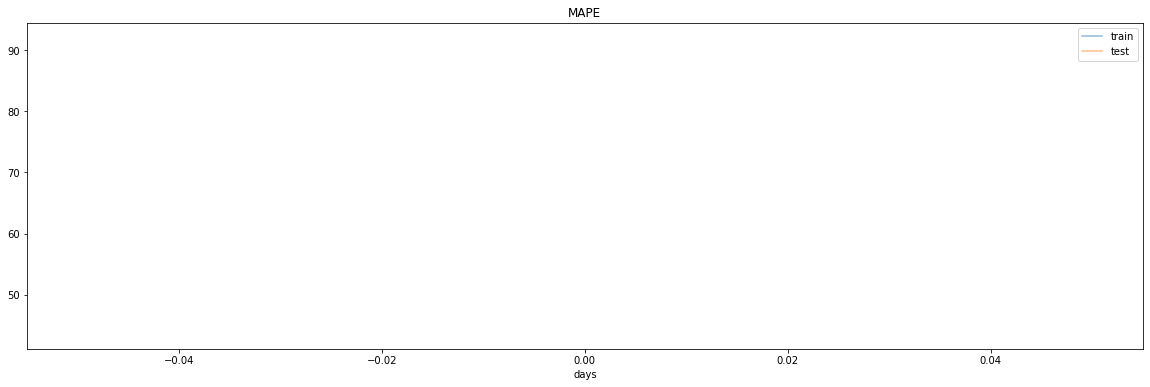

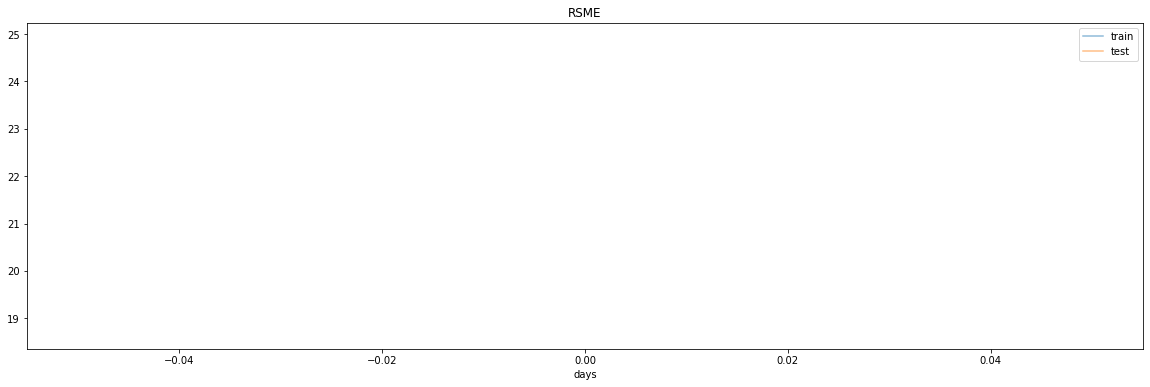

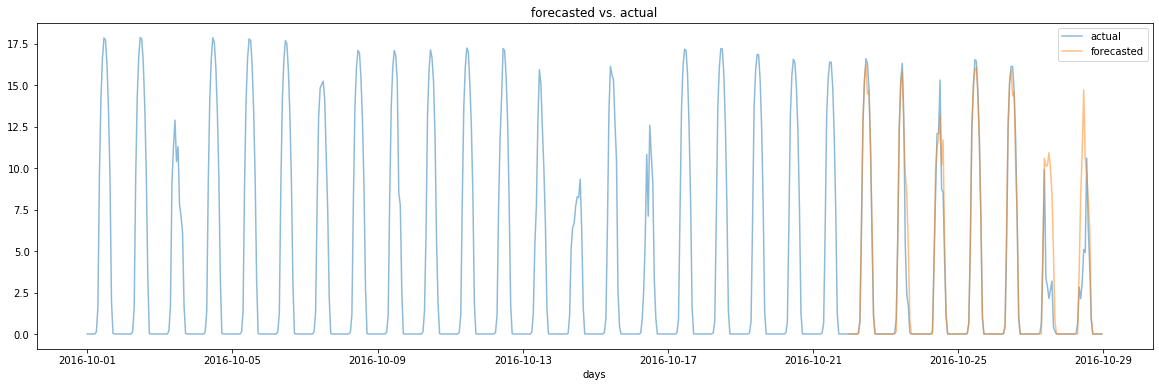

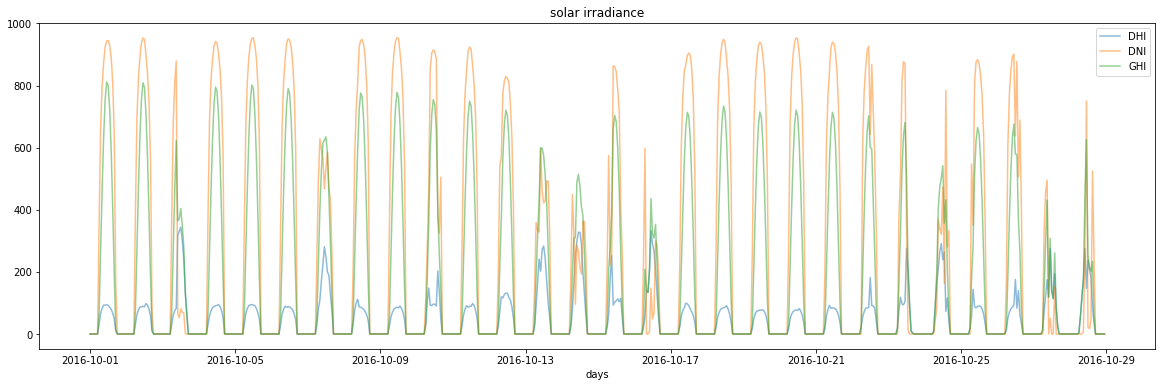

In [237]:
data_test1_all_w, data_for_all_w, solar_data_w, hist_data_w, weather_data_w, train_mape_w, test_mape_w, graph_index_a_w, graph_index_f_w = forecast_week(dt.datetime(2016,10,1,0,0))

In [238]:
#save out data
historical = hist_data_w.to_frame()
forecast = pd.DataFrame(data_for_all_w, index=graph_index_f_w, columns=['forecast'])
solar_i = pd.DataFrame(solar_data_w, index=graph_index_a_w)
sunlight = weather_data_w.to_frame()

all_data = pd.merge(historical,forecast,left_index=True,right_index=True,how='left')
all_data = pd.merge(all_data,solar_i,left_index=True,right_index=True)
all_data = pd.merge(all_data,sunlight,left_index=True,right_index=True)

### Compare daily for same time period

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


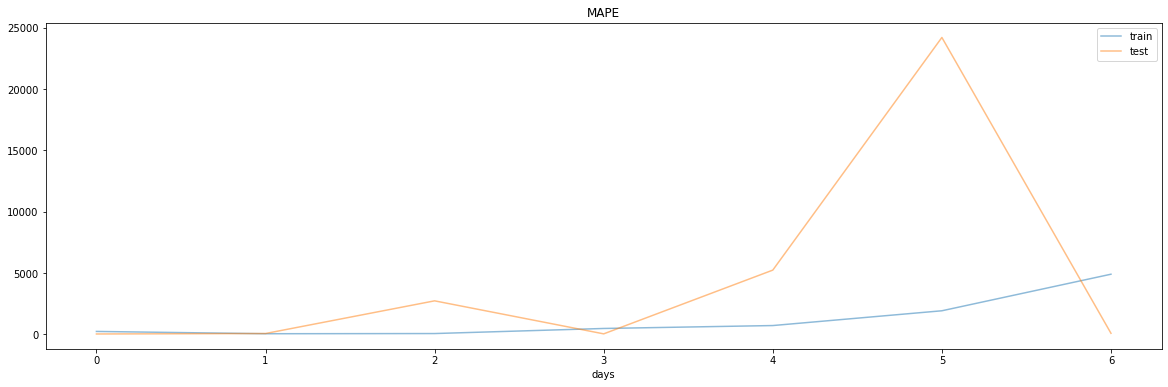

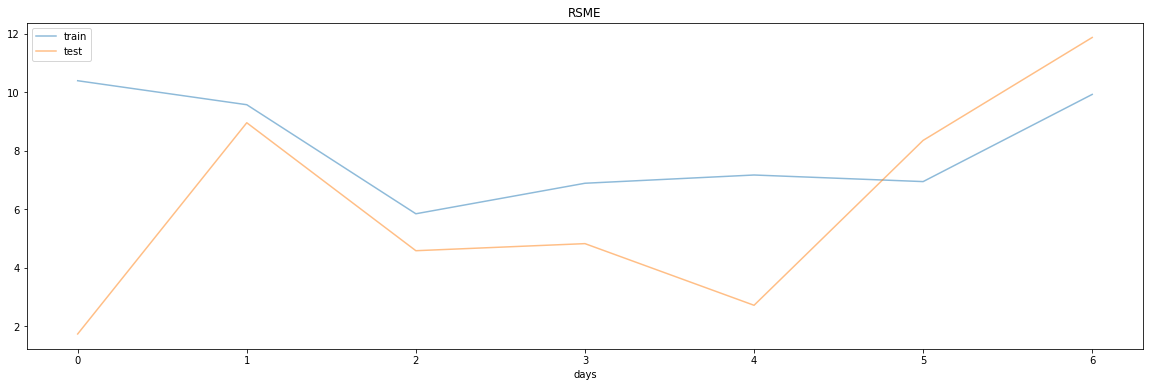

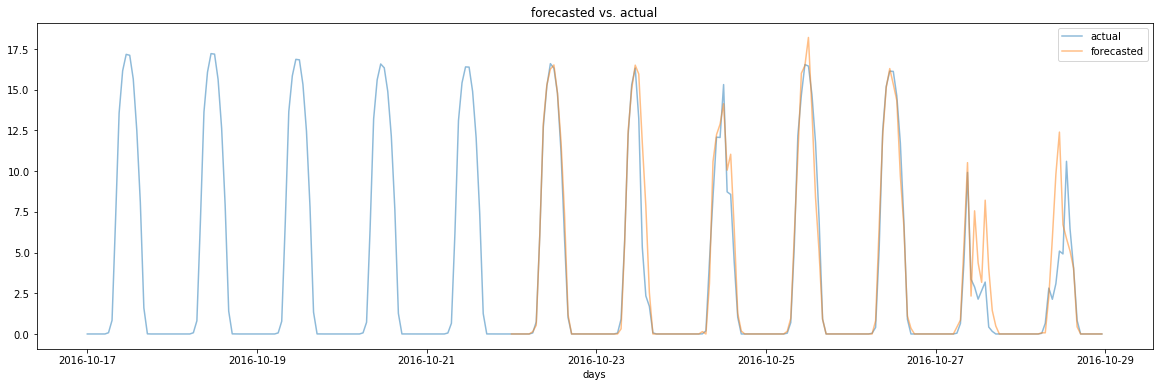

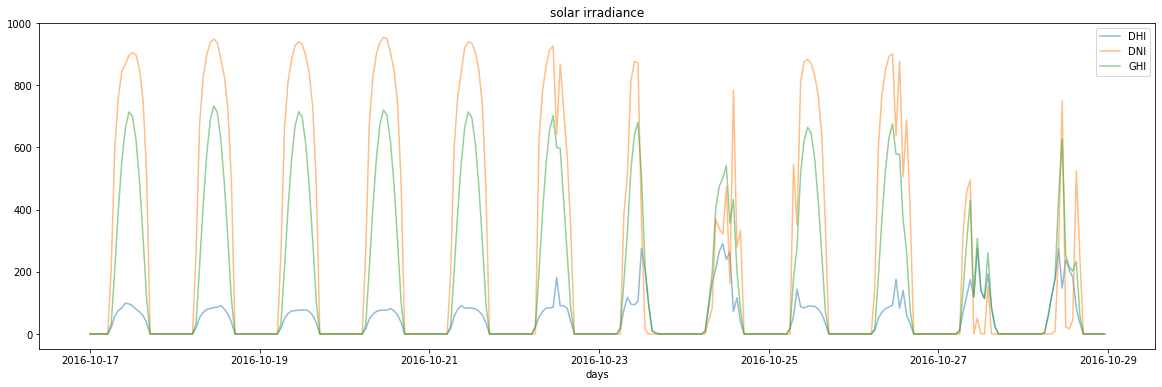

In [242]:
data_test1_all3, data_for_all3, solar_data3, hist_data3, weather_data3, train_mape3, test_mape3, graph_index_a3, graph_index_f3 = forecast(dt.datetime(2016,10,17,0,0),x=5,ndays=7)


In [243]:
#save out data
historical3 = hist_data3.to_frame()
forecast3 = pd.DataFrame(data_for_all3, index=graph_index_f3, columns=['forecast'])
solar3 = pd.DataFrame(solar_data3, index=graph_index_a3)
sunlight3 = weather_data3.to_frame()

all_data3 = pd.merge(historical3,forecast3,left_index=True,right_index=True,how='left')
all_data3 = pd.merge(all_data3,solar3,left_index=True,right_index=True)
all_data3 = pd.merge(all_data3,sunlight3,left_index=True,right_index=True)

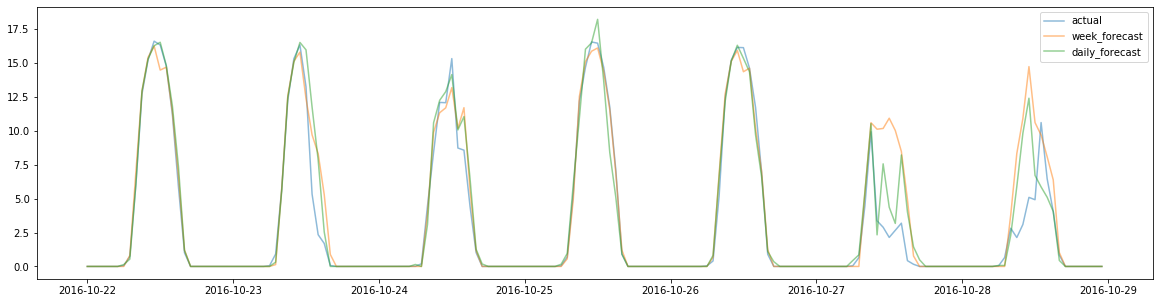

In [245]:
plt.figure(figsize=(20,5))
plt.plot(all_data['kWh'][dt.datetime(2016,10,22,0,0):],label='actual',alpha=0.5)
plt.plot(all_data['forecast'][dt.datetime(2016,10,22,0,0):],label='week_forecast',alpha=0.5)
plt.plot(all_data3['forecast'][dt.datetime(2016,10,22,0,0):],label='daily_forecast',alpha=0.5)
plt.legend();

In [246]:
week_mape = all_data[['kWh','forecast']][dt.datetime(2016,10,22,0,0):dt.datetime(2016,10,29,0,0)]
daily_mape = all_data3[['kWh','forecast']][dt.datetime(2016,10,22,0,0):dt.datetime(2016,10,29,0,0)]
# week_mape = week_mape[week_mape['kWh']>0]
# daily_mape = daily_mape[daily_mape['kWh']>0]

In [247]:
week_mape['AE'] = (week_mape['kWh']-week_mape['forecast'])
daily_mape['AE'] = (daily_mape['kWh']-daily_mape['forecast'])

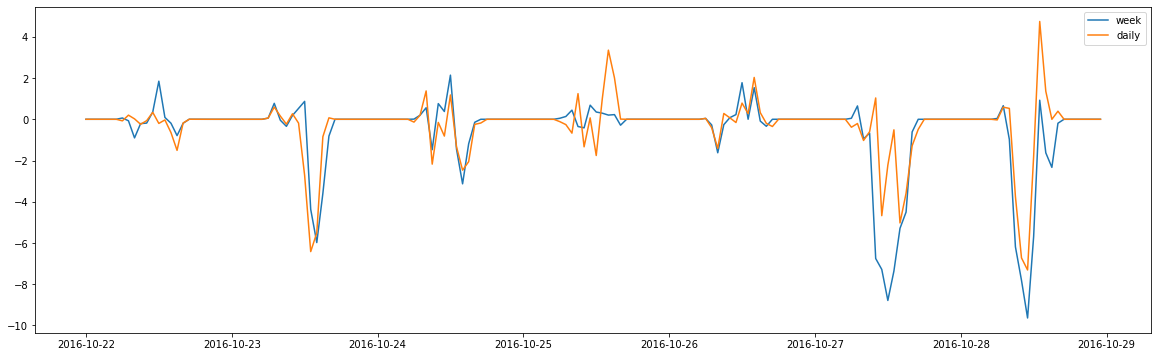

In [248]:
plt.figure(figsize=(20,6))
plt.plot(week_mape['AE'],label='week')
plt.plot(daily_mape['AE'],label='daily')
plt.legend();

In [249]:
print('weekly:', np.mean(week_mape['AE']))
print('daily:', np.mean(daily_mape['AE']))

weekly: -0.5249201127317451
daily: -0.2983920785011636


In [250]:
np.mean(abs(week_mape.groupby(week_mape.index.date)['AE'].sum()))

13.287544742780794

In [251]:
np.mean(abs(daily_mape.groupby(daily_mape.index.date)['AE'].sum()))

8.540498003819875

In [252]:
abs(week_mape.groupby(week_mape.index.date)['AE'].sum())

2016-10-22     0.192638
2016-10-23    12.731034
2016-10-24     3.347559
2016-10-25     1.337560
2016-10-26     1.075557
2016-10-27    41.504538
2016-10-28    32.823926
Name: AE, dtype: float64

In [253]:
abs(daily_mape.groupby(daily_mape.index.date)['AE'].sum())

2016-10-22     2.393078
2016-10-23    14.772590
2016-10-24     6.817169
2016-10-25     3.548223
2016-10-26     1.278585
2016-10-27    18.981103
2016-10-28    11.992738
Name: AE, dtype: float64

In [255]:
week_mape[week_mape.index.date==dt.date(2016,10,24)]

,kWh,forecast,AE
date_time,,,
2016-10-24 00:00:00,0.00000,0.000000,0.000000
2016-10-24 01:00:00,0.00000,0.000000,0.000000
2016-10-24 02:00:00,0.00000,0.000000,0.000000
2016-10-24 03:00:00,0.00000,0.000000,0.000000
2016-10-24 04:00:00,0.00000,0.000000,0.000000
2016-10-24 05:00:00,0.00000,0.000000,0.000000
2016-10-24 06:00:00,0.00804,0.000000,0.008040
2016-10-24 07:00:00,0.19635,0.000000,0.196350
2016-10-24 08:00:00,4.46943,3.909696,0.559734


In [256]:
daily_mape[daily_mape.index.date==dt.date(2016,10,24)]

,kWh,forecast,AE
date_time,,,
2016-10-24 00:00:00,0.00000,0.000000,0.000000
2016-10-24 01:00:00,0.00000,0.000000,0.000000
2016-10-24 02:00:00,0.00000,0.000000,0.000000
2016-10-24 03:00:00,0.00000,0.000000,0.000000
2016-10-24 04:00:00,0.00000,0.000000,0.000000
2016-10-24 05:00:00,0.00000,0.000000,0.000000
2016-10-24 06:00:00,0.00804,0.145064,-0.137024
2016-10-24 07:00:00,0.19635,0.000000,0.196350
2016-10-24 08:00:00,4.46943,3.094796,1.374634


## more viz

In [34]:
all_data = pd.read_csv('output/all_data.csv')

In [36]:
all_data.index = [dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in all_data['date_time']]

In [38]:
all_data.drop('date_time',axis=1,inplace=True)
all_data.head(5)

,kWh,forecast,DHI,DNI,GHI,sunlight,kWh2,forecast2,join_var
2015-12-08 00:00:00,0.0,NaN,0,0,0,0,0.0,NaN,12
2015-12-08 01:00:00,0.0,NaN,0,0,0,0,0.0,NaN,12
2015-12-08 02:00:00,0.0,NaN,0,0,0,0,0.0,NaN,12
2015-12-08 03:00:00,0.0,NaN,0,0,0,0,0.0,NaN,12
2015-12-08 04:00:00,0.0,NaN,0,0,0,0,0.0,NaN,12


In [39]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8880 entries, 2015-12-08 00:00:00 to 2016-12-11 23:00:00
Data columns (total 9 columns):
kWh          8880 non-null float64
forecast     8760 non-null float64
DHI          8880 non-null int64
DNI          8880 non-null int64
GHI          8880 non-null int64
sunlight     8880 non-null int64
kWh2         8880 non-null float64
forecast2    8760 non-null float64
join_var     8880 non-null int64
dtypes: float64(4), int64(5)
memory usage: 693.8 KB


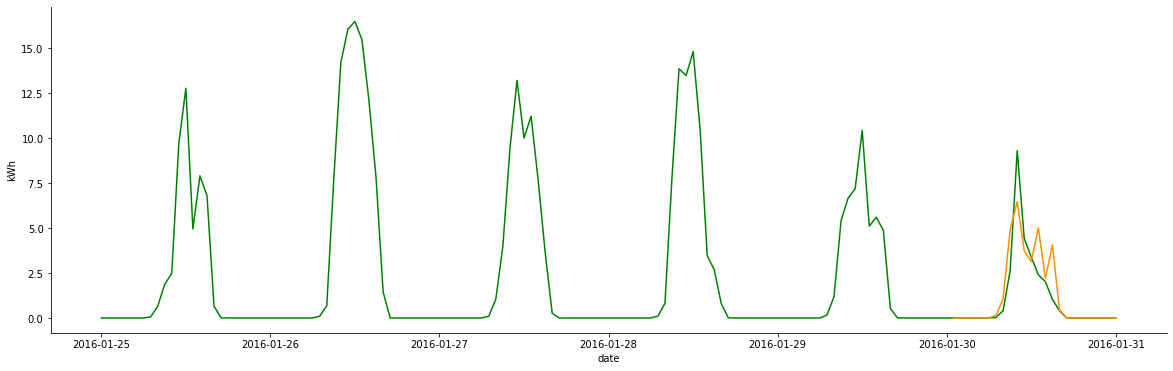

In [198]:
#figure 1
start = dt.datetime(2016,1,25,0,0)
end = start+dt.timedelta(days=5)
start1=end+dt.timedelta(hours=1)
end1= start1+dt.timedelta(hours=23)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,6))

ax.plot(all_data['kWh2'][start:end1],c='#008000')
ax.plot(all_data['forecast2'][start1:end1],c='#ff8f00ff')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.set_xlabel('date')
ax.set_ylabel('kWh')

fig.savefig("figures/forecast_kWh_2016126.png", bbox_inches = 'tight',transparent=True);

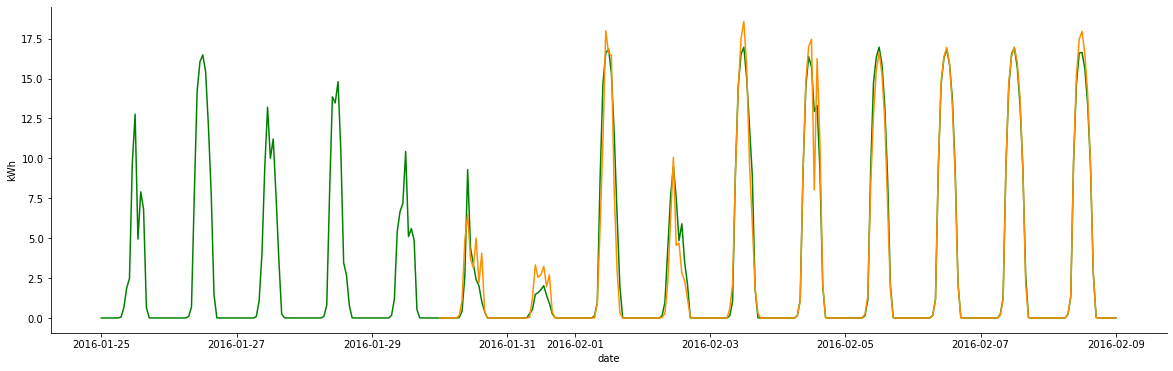

In [200]:
#figure 2
start = dt.datetime(2016,1,25,0,0)
end = start+dt.timedelta(days=14)
start1=end+dt.timedelta(hours=1)
end1= start1+dt.timedelta(hours=23)
start2= start+dt.timedelta(days=5)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,6))

ax.plot(all_data['kWh2'][start:end1],c='#008000')
ax.plot(all_data['forecast2'][start2:end1],c='#ff8f00ff')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.set_xlabel('date')
ax.set_ylabel('kWh')

fig.savefig("figures/forecast2_kWh_2016126.png", bbox_inches = 'tight',transparent=True);

In [84]:
forecast_perf = pd.read_csv('output/forecast_perf.csv')

In [87]:
forecast_perf.index = [dt.datetime.strptime(x, '%Y-%m-%d') for x in forecast_perf['Unnamed: 0']]

In [89]:
forecast_perf.drop('Unnamed: 0',axis=1,inplace=True)
forecast_perf.head(5)

,MAE,MAE2,MAE2_30D_mean
2015-12-13,0.149961,0.161789,NaN
2015-12-14,0.093169,0.097647,NaN
2015-12-15,0.042504,0.043420,NaN
2015-12-16,0.007080,0.007105,NaN
2015-12-17,0.014164,0.014265,NaN


In [105]:
forecast_perf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-12-13 to 2016-12-11
Data columns (total 3 columns):
MAE              365 non-null float64
MAE2             365 non-null float64
MAE2_30D_mean    336 non-null float64
dtypes: float64(3)
memory usage: 11.4 KB


In [122]:
#suppress leap day
start= dt.datetime(2016,2,29,0,0)
end=start+dt.timedelta(hours=23)

forecast_perf['MAE2'][start:end] =0

forecast_perf[start:end] 

,MAE,MAE2,MAE2_30D_mean
2016-02-29,0.944688,0.0,0.166711


''

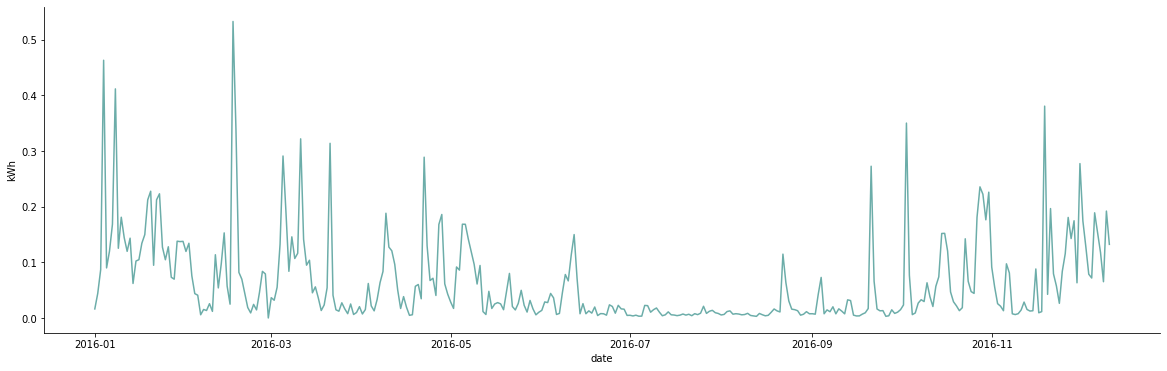

In [150]:
#figure 3
start = dt.datetime(2016,1,1,0,0)
end = start+dt.timedelta(days=365)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,6))

ax.plot(forecast_perf['MAE2'][start:end],c='#6cada9')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.set_xlabel('date')
ax.set_ylabel('kWh')
;

In [126]:
np.mean(forecast_perf['MAE2'])

0.0681148675198561

In [140]:
new_ae = all_data[['kWh2','forecast2']][(all_data['kWh2']!=0) & (np.isnan(all_data['forecast2'])==False)]

In [141]:
new_ae['AE'] = all_data['kWh2']-all_data['forecast2']
new_ae['absAE'] = abs(new_ae['AE'])

Text(0, 0.5, 'kWh')

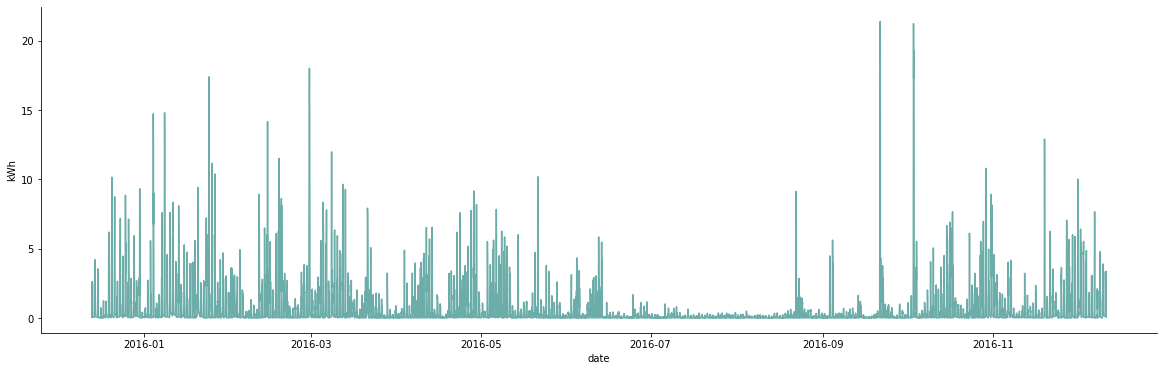

In [144]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,6))

ax.plot(new_ae['absAE'],c='#6cada9')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.set_xlabel('date')
ax.set_ylabel('kWh')

In [193]:
new_mae = new_ae.groupby(new_ae.index.date)['absAE'].mean()

In [194]:
#suppress spikes - leap day & bad data
#suppress leap day
start= dt.date(2016,2,29)

new_mae[dt.date(2016,2,29)] = 0
# new_mae[dt.date(2016,10,3)] = 0

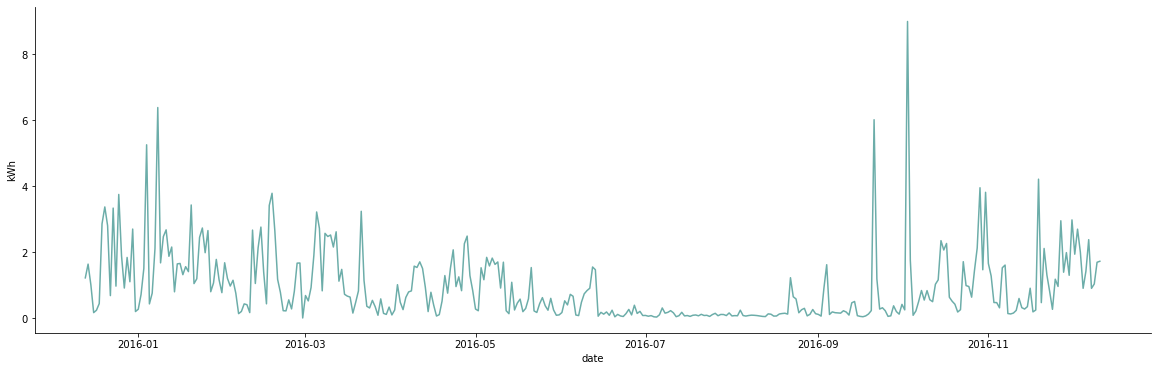

In [195]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,6))

ax.plot(new_mae,c='#6cada9')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.set_xlabel('date')
ax.set_ylabel('kWh')

fig.savefig("figures/mae_kWh_2016.png", bbox_inches = 'tight',transparent=True);

In [148]:
new_mae.shape

(365,)

In [149]:
np.mean(new_mae)

0.9515370300955955

In [153]:
new_mae.tail(1)

2016-12-11    1.719494
Name: absAE, dtype: float64

In [154]:
np.mean(new_ae['kWh2'])

7.7824060139416975

In [177]:
np.mean(new_mae)/np.mean(new_ae['kWh2'])

0.12226771879942733

In [155]:
new_ae.shape

(4734, 4)

In [174]:
# Total MAE
sum_kWh = new_ae.groupby(new_ae.index.date)['kWh2'].sum()
sum_AE = new_ae.groupby(new_ae.index.date)['absAE'].sum()

In [159]:
np.mean(sum_kWh)

100.93673991780821

In [175]:
np.mean(sum_AE)

11.325414210526086

In [176]:
np.mean(sum_AE)/np.mean(sum_kWh)

0.11220309096319396

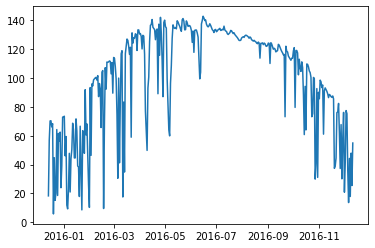

In [162]:
plt.plot(sum_kWh);

In [171]:
test = data_train.groupby(data_train.index.date).sum()

In [173]:
np.mean(test)

100.82543396441606

In [196]:
#Reported total MAE
np.mean(new_ae['absAE'])

0.8732100098948078

In [197]:
np.mean(new_ae['kWh2'])

7.7824060139416975